# Exercício 4

Dada uma barra com uma carga $P$ aplicada no meio do seu vão, conforme indicado na Figura, pede-se, utilizando elementos finitos lineares, calcular os deslocamentos da mesma adotando-se uma divisão de 2, 4 e 6 elementos lineares. Comparar os campos de deslocamentos obtidos com os deslocamentos exatos para o problema em questão. Considere:

* $EA = 10^5 \cdot (N + 1)$ (Newton) 
* $P = (N + 1) \cdot 10^3$ (Newton)
* $l = 2 + \frac{N+1}{20}$ (metro)



#### Resolução



### Substituindo $N$

Substituindo $N = 0$, temos:

* $EA = 10^5$ (Newton)
* $P = 10^3$ (Newton)
* $l = \frac{41}{20}$ (metro)

### Equação do problema

$$
-EA \frac{\partial ^2 u(x)}{\partial x^2} = P \delta \left( x-\frac{L}{2} \right), 0 \leq x \leq L
$$

onde $\delta$ é a função delta de Dirac.

### Malhas

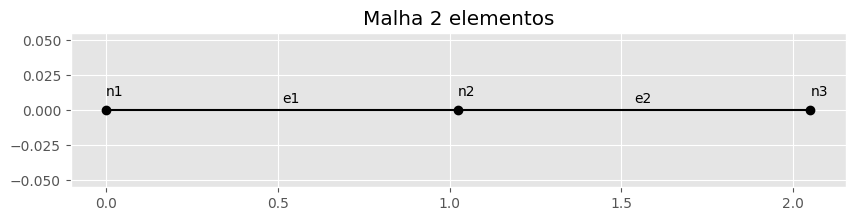

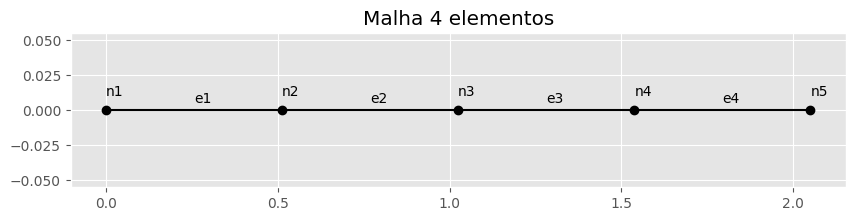

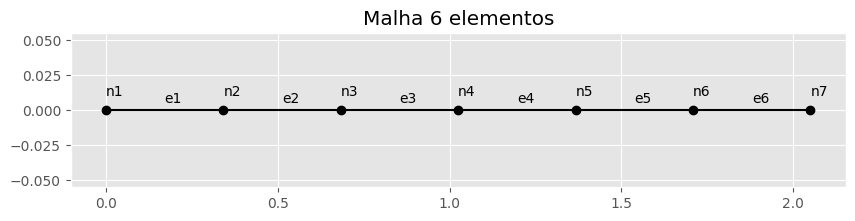

In [9]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
L=41/20
for n in [2, 4, 6]:
    plt.figure(figsize=(10,2))
    plt.plot([i*L/n for i in range(n+1)],
            [0 for i in range(n+1)],
            '-o',
            color='black'
    )
    for i in range(n):
        plt.annotate(f'n{i+1}', (i*L/n,0.01))
        plt.annotate(f'e{i+1}', (i*L/n + (L/n)/2,0.005))
    plt.annotate(f'n{n+1}', (L, 0.01))
    plt.title(f'Malha {n} elementos')
    plt.show()

### Condições de Contorno

Da figura, temos que $u(0) = 0$ (condição de Dirichlet).

### Aproximação Linear

Neste problema utilizaremos somente a aproximação linear, na forma:

$$
u = u_1 \phi_1 + u_2 \phi_2
$$

## Aproximação com 2 Elementos



### Definindo variáveis e calculando $h$

In [46]:
import sympy as sp

EA, P, x, h, K, L = sp.symbols('EA P x h K L')

n_elements = 2
h = L/n_elements

### Matriz de Rigidez por elemento

Inicialmente, calculamos a matriz de rigidez conforme calculado no exercício anterior:

In [47]:
phi_1 = 1 - x/h
phi_2 = x/h

K = EA * sp.Matrix([
    [sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_1, x), (x, 0, h)), sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_2, x), (x, 0, h))], 
    [sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_1, x), (x, 0, h)), sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_2, x), (x, 0, h))]
])
display(K)

Matrix([
[ 2*EA/L, -2*EA/L],
[-2*EA/L,  2*EA/L]])

### Matriz de Rigidez Global

Diferentemente da aproximação linear abordada anteriormente, neste caso como temos mais do que apenas 1 elemento, será necessário calcular a Matriz de Rigidez Global conforme:

$$
K =
\begin{bmatrix}
k_{11}^1    & k_{12}^1              & 0                     & 0 & \cdots & 0 & 0 \\ 
k_{21}^1    & k_{22}^1 + k_{11}^2   & k_{12}^2              & 0 & \cdots & 0 & 0 \\ 
0           & k_{21}^2              & k_{12}^2 + k_{11}^3   & k_{12}^3 & \cdots & 0 & 0 \\ 
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\ 
0 & 0 & 0 & 0 & \cdots & k_{21}^e & k_{22}^e
\end{bmatrix}
$$

onde $e$ é o número de elementos.


In [48]:
K_G = sp.zeros(n_elements + 1)

for i in range(n_elements):
    K_G[i:i+2, i:i+2] += K

display(K_G)

Matrix([
[ 2*EA/L, -2*EA/L,       0],
[-2*EA/L,  4*EA/L, -2*EA/L],
[      0, -2*EA/L,  2*EA/L]])

### Vetor Fonte Global

In [49]:
def dirac(d):
    if d == L/2:
        return 1
    return 0

F = sp.zeros(n_elements + 1, 1)

for i in range(n_elements):
    F[i, 0] = P * dirac(i*h)

display(F)

Matrix([
[0],
[P],
[0]])

### Aplicando Condições de Contorno

In [50]:
for i in range(n_elements + 1):
    K_G[0, i] = 0.0
    K_G[i, 0] = 0.0
K_G[0, 0] = 1.0
F[0]      = 0.0
display(K_G)
display(F)

Matrix([
[1.0,       0,       0],
[  0,  4*EA/L, -2*EA/L],
[  0, -2*EA/L,  2*EA/L]])

Matrix([
[0],
[P],
[0]])

### Substituindo valores

In [51]:
K2 = K_G.subs({
    EA: 10**5,
    L: 41/20
})
display(K2)

Matrix([
[1.0,                 0,                 0],
[  0,  195121.951219512, -97560.9756097561],
[  0, -97560.9756097561,  97560.9756097561]])

In [52]:
F2 = F.subs({
    P: 10**3
})
display(F2)

Matrix([
[   0],
[1000],
[   0]])

### Calculando $u$

In [53]:
u2 = K2.inv() * F2
display(u2)

Matrix([
[      0],
[0.01025],
[0.01025]])

## Aproximação com 4 elementos

Neste caso iremos repetir os mesmos passos porém utilizando 4 elementos:

### Calculando $h$

In [54]:
EA, P, x, h, K, L = sp.symbols('EA P x h K L')

n_elements = 4
h = L/n_elements

### Matriz de Rigidez por elemento

Inicialmente, calculamos a matriz de rigidez conforme calculado no exercício anterior:

In [55]:
phi_1 = 1 - x/h
phi_2 = x/h

K = EA * sp.Matrix([
    [sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_1, x), (x, 0, h)), sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_2, x), (x, 0, h))], 
    [sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_1, x), (x, 0, h)), sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_2, x), (x, 0, h))]
])
display(K)

Matrix([
[ 4*EA/L, -4*EA/L],
[-4*EA/L,  4*EA/L]])

### Matriz de Rigidez Global

Diferentemente da aproximação linear abordada anteriormente, neste caso como temos mais do que apenas 1 elemento, será necessário calcular a Matriz de Rigidez Global conforme:

$$
K =
\begin{bmatrix}
k_{11}^1    & k_{12}^1              & 0                     & 0 & \cdots & 0 & 0 \\ 
k_{21}^1    & k_{22}^1 + k_{11}^2   & k_{12}^2              & 0 & \cdots & 0 & 0 \\ 
0           & k_{21}^2              & k_{12}^2 + k_{11}^3   & k_{12}^3 & \cdots & 0 & 0 \\ 
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\ 
0 & 0 & 0 & 0 & \cdots & k_{21}^e & k_{22}^e
\end{bmatrix}
$$

onde $e$ é o número de elementos.


In [56]:
K_G = sp.zeros(n_elements + 1)

for i in range(n_elements):
    K_G[i:i+2, i:i+2] += K

display(K_G)

Matrix([
[ 4*EA/L, -4*EA/L,       0,       0,       0],
[-4*EA/L,  8*EA/L, -4*EA/L,       0,       0],
[      0, -4*EA/L,  8*EA/L, -4*EA/L,       0],
[      0,       0, -4*EA/L,  8*EA/L, -4*EA/L],
[      0,       0,       0, -4*EA/L,  4*EA/L]])

### Vetor Fonte Global

In [57]:
def dirac(d):
    if d == L/2:
        return 1
    return 0

F = sp.zeros(n_elements + 1, 1)

for i in range(n_elements):
    F[i, 0] = P * dirac(i*h)

display(F)

Matrix([
[0],
[0],
[P],
[0],
[0]])

### Aplicando Condições de Contorno

In [58]:
for i in range(n_elements + 1):
    K_G[0, i] = 0.0
    K_G[i, 0] = 0.0
K_G[0, 0] = 1.0
F[0]      = 0.0
display(K_G)
display(F)

Matrix([
[1.0,       0,       0,       0,       0],
[  0,  8*EA/L, -4*EA/L,       0,       0],
[  0, -4*EA/L,  8*EA/L, -4*EA/L,       0],
[  0,       0, -4*EA/L,  8*EA/L, -4*EA/L],
[  0,       0,       0, -4*EA/L,  4*EA/L]])

Matrix([
[0],
[0],
[P],
[0],
[0]])

### Substituindo valores

In [59]:
K4 = K_G.subs({
    EA: 10**5,
    L: 41/20
})
display(K4)

Matrix([
[1.0,                 0,                 0,                 0,                 0],
[  0,  390243.902439024, -195121.951219512,                 0,                 0],
[  0, -195121.951219512,  390243.902439024, -195121.951219512,                 0],
[  0,                 0, -195121.951219512,  390243.902439024, -195121.951219512],
[  0,                 0,                 0, -195121.951219512,  195121.951219512]])

In [60]:
F4 = F.subs({
    P: 10**3
})
display(F4)

Matrix([
[   0],
[   0],
[1000],
[   0],
[   0]])

### Calculando $u$

In [61]:
u4 = K4.inv() * F4
display(u4)

Matrix([
[       0],
[0.005125],
[ 0.01025],
[ 0.01025],
[ 0.01025]])

## Aproximação com 6 elementos

### Calculando $h$

In [62]:
EA, P, x, h, K, L = sp.symbols('EA P x h K L')

n_elements = 6
h = L/n_elements

### Matriz de Rigidez por elemento

Inicialmente, calculamos a matriz de rigidez conforme calculado no exercício anterior:

In [63]:
phi_1 = 1 - x/h
phi_2 = x/h

K = EA * sp.Matrix([
    [sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_1, x), (x, 0, h)), sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_2, x), (x, 0, h))], 
    [sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_1, x), (x, 0, h)), sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_2, x), (x, 0, h))]
])
display(K)

Matrix([
[ 6*EA/L, -6*EA/L],
[-6*EA/L,  6*EA/L]])

### Matriz de Rigidez Global

Diferentemente da aproximação linear abordada anteriormente, neste caso como temos mais do que apenas 1 elemento, será necessário calcular a Matriz de Rigidez Global conforme:

$$
K =
\begin{bmatrix}
k_{11}^1    & k_{12}^1              & 0                     & 0 & \cdots & 0 & 0 \\ 
k_{21}^1    & k_{22}^1 + k_{11}^2   & k_{12}^2              & 0 & \cdots & 0 & 0 \\ 
0           & k_{21}^2              & k_{12}^2 + k_{11}^3   & k_{12}^3 & \cdots & 0 & 0 \\ 
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\ 
0 & 0 & 0 & 0 & \cdots & k_{21}^e & k_{22}^e
\end{bmatrix}
$$

onde $e$ é o número de elementos.


In [64]:
K_G = sp.zeros(n_elements + 1)

for i in range(n_elements):
    K_G[i:i+2, i:i+2] += K

display(K_G)

Matrix([
[ 6*EA/L, -6*EA/L,       0,       0,       0,       0,       0],
[-6*EA/L, 12*EA/L, -6*EA/L,       0,       0,       0,       0],
[      0, -6*EA/L, 12*EA/L, -6*EA/L,       0,       0,       0],
[      0,       0, -6*EA/L, 12*EA/L, -6*EA/L,       0,       0],
[      0,       0,       0, -6*EA/L, 12*EA/L, -6*EA/L,       0],
[      0,       0,       0,       0, -6*EA/L, 12*EA/L, -6*EA/L],
[      0,       0,       0,       0,       0, -6*EA/L,  6*EA/L]])

### Vetor Fonte Global

In [65]:
def dirac(d):
    if d == L/2:
        return 1
    return 0

F = sp.zeros(n_elements + 1, 1)

for i in range(n_elements):
    F[i, 0] = P * dirac(i*h)

display(F)

Matrix([
[0],
[0],
[0],
[P],
[0],
[0],
[0]])

### Aplicando Condições de Contorno

In [66]:
for i in range(n_elements + 1):
    K_G[0, i] = 0.0
    K_G[i, 0] = 0.0
K_G[0, 0] = 1.0
F[0]      = 0.0
display(K_G)
display(F)

Matrix([
[1.0,       0,       0,       0,       0,       0,       0],
[  0, 12*EA/L, -6*EA/L,       0,       0,       0,       0],
[  0, -6*EA/L, 12*EA/L, -6*EA/L,       0,       0,       0],
[  0,       0, -6*EA/L, 12*EA/L, -6*EA/L,       0,       0],
[  0,       0,       0, -6*EA/L, 12*EA/L, -6*EA/L,       0],
[  0,       0,       0,       0, -6*EA/L, 12*EA/L, -6*EA/L],
[  0,       0,       0,       0,       0, -6*EA/L,  6*EA/L]])

Matrix([
[0],
[0],
[0],
[P],
[0],
[0],
[0]])

### Substituindo valores

In [67]:
K6 = K_G.subs({
    EA: 10**5,
    L: 41/20
})
display(K6)

Matrix([
[1.0,                 0,                 0,                 0,                 0,                 0,                 0],
[  0,  585365.853658537, -292682.926829268,                 0,                 0,                 0,                 0],
[  0, -292682.926829268,  585365.853658537, -292682.926829268,                 0,                 0,                 0],
[  0,                 0, -292682.926829268,  585365.853658537, -292682.926829268,                 0,                 0],
[  0,                 0,                 0, -292682.926829268,  585365.853658537, -292682.926829268,                 0],
[  0,                 0,                 0,                 0, -292682.926829268,  585365.853658537, -292682.926829268],
[  0,                 0,                 0,                 0,                 0, -292682.926829268,  292682.926829268]])

In [68]:
F6 = F.subs({
    P: 10**3
})
display(F6)

Matrix([
[   0],
[   0],
[   0],
[1000],
[   0],
[   0],
[   0]])

### Calculando $u$

In [69]:
u6 = K6.inv() * F6
display(u6)

Matrix([
[                  0],
[0.00341666666666667],
[0.00683333333333333],
[            0.01025],
[            0.01025],
[            0.01025],
[            0.01025]])

## Resultados

In [74]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
L = 41/20

### 2 elementos

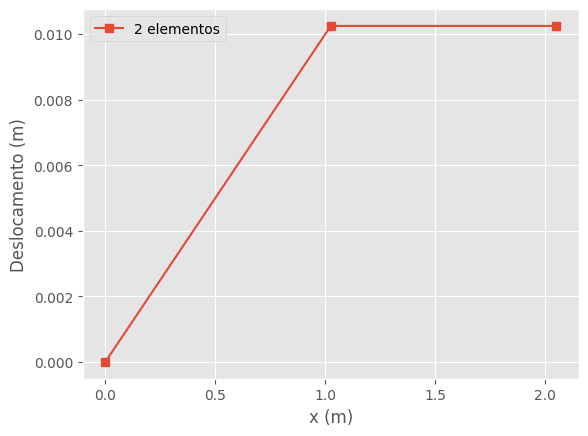

In [77]:
plt.plot([i*L/2 for i in range(3)], u2, '-s', label='2 elementos')

plt.xlabel('x (m)')
plt.ylabel('Deslocamento (m)')
plt.legend()
plt.show()

### 4 elementos

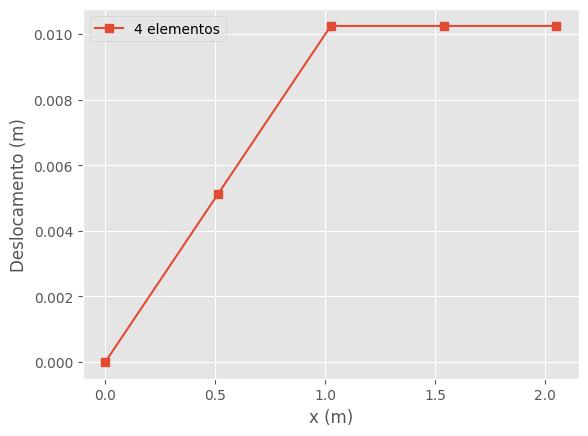

In [76]:
plt.plot([i*L/4 for i in range(5)], u4, '-s', label='4 elementos')

plt.xlabel('x (m)')
plt.ylabel('Deslocamento (m)')
plt.legend()
plt.show()

### 6 elementos

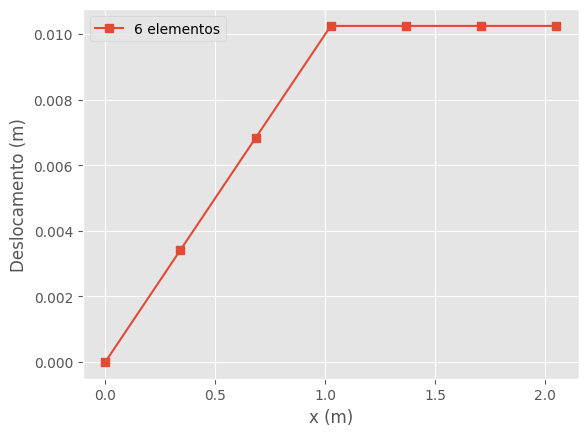

In [75]:
plt.plot([i*L/6 for i in range(7)], u6, '-s', label='6 elementos')

plt.xlabel('x (m)')
plt.ylabel('Deslocamento (m)')
plt.legend()
plt.show()